# **Import the libararies**

In [1]:
import pandas as pd
import numpy as np
import nltk as nlp
import re
import string


# **import the** **dataset**

In [2]:
df = pd.read_excel('/content/drive/MyDrive/Reassigment/nepalimoviereviews.csv.xlsx')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 678 entries, 0 to 677
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Reviews  678 non-null    object
 1   Emotion  678 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 10.7+ KB


In [4]:

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).







# **Data preprocessing**

# **Removing punctuation**

In [5]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [6]:
def remove_punctuation(text):
  addpunctuation = "।"
  string.punctuation = string.punctuation + addpunctuation
  punctuationfree="".join([i for i in text if i not in string.punctuation])
  return punctuationfree

In [7]:
df['Reviews'] = df['Reviews'].apply(lambda x: remove_punctuation(x))

# **TOKENIZATION**

In [8]:
!pip install nltk
! pip install nepalitokenizer
! pip install nepali-stemmer

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 149.0/149.0 kB 5.2 MB/s eta 0:00:00


In [9]:
from nltk.tokenize import sent_tokenize, word_tokenize
from nepali_stemmer.stemmer import NepStemmer
from nepalitokenizer import NepaliTokenizer
nepstem = NepStemmer()
tokenize = NepaliTokenizer()

In [10]:
import nltk
nltk.download('punkt')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [11]:
df['Reviews']= df['Reviews'].apply(word_tokenize)

In [12]:
df['Reviews']

,Reviews
0,"[म, एक, शिक्षक, शिक्षा, क्षेत्रमा, रमाएको, मान्छे, सामुदायिक, विद्यालयमा, अध्यापन, गराउछु, मलाइ, यो, चलचित्रले, मन, नै, छोयो, वास्तविक, घटना, यहि, हो, कि, नेपालका, तमाम, सामुदायिक, विद्यालय, यहि, समस्या, बाट, गुज्रीत, छन, यस्तै, शिक्षा, सम्बन्धीको, चलचित्र, बनोस, भनेर, अपेक्षा, गरेको, थिए, आसा, पूरा, भयो, धन्यवाद, सबै, लाइ]"
1,"[म, सरकारी, स्कूलकलेजमा, पढेर, करीब, १२, बर्ष, भन्दा, बढी, बिभिन्न, बोडिङ्ग, स्कूलमा, पढाएको, शिक्षक, तर, पनि, म, सरकारी, स्कूल, नै, राम्रो, हुनुपर्छ, भन्छुफिल्म, सन्देशमुलक, छसबैले, हेर्नुहोला]"
2,"[कति, राम्रो, शिव, मन्दिर, देख्न, पाइयो, कुन, ठाउको, होला, धन्यवाद, सम्पुर्ण, टिमलाई, विशेष, केदार, अनि, काली, आमा]"
3,"[मारुनी, भन्ने, वितिकै, सामान्य, नाचनीमा, आधारित, कथा, होला, जस्तो, लागेको, थियो, तर, यस्तो, कथामा, आधारित, र, यती, राम्रो, कहानी, फिल्म, होला, जस्तो, सोचेको, थिईन, जव, फिल्म, पूरा, हेरियो, साचै, नेपाली, फिल्म, इन्ड्रस्टी, मा, ठूलो, फडको, मारेको, जस्तो, लाग्यो, मारुनी, सवैलाई, हेर्न, अनुरोध, गर्दछु, रेटिङ, ५, स्टार, मारुनी, फिल्म, टिमलाई, धन्यवाद]"
4,"[यो, फ्लिम, हेरिसकेपछी, थाहा, भयो, कि, किन, दर्सकहरुले, साम्राज्ञिलाई, यति, धेरै, माया, गर्नुहुन्छ, भनेरउहाको, अभिनयको, जति, नै, तारिफ, गरे, नि, कमै, हुन्छ]"
5,"[एकदमै, मन, छोयो, असल, मान्छेको, सङ्गतले, खराब, मान्छे, पनि, असल, हुन्छ, पक्कै, पनि, घटनाक्रम, छोटो, भएपनि, यतार्थ, छ, l, धन्यबाद, आगामी, दिनमा, पनि, यस्तै, लघु, चलचित्र, हेर्न, पाइयोस, शुभकामना, छ, l]"
6,"[उपनियाशमा, चलचित्र, बनाउदा, सबैको, बुचार, गरेर, बनाको, भय, राम्रो, हुने, थियो, कलकार, छनोट, अनि, उमेरमा, धेरै, फरक, परेको, छ, जस्तो, बसन्ती, चलचित्र, जस्तो, बन्न, सकेन]"
7,"[नेपालमा, बनेको, अहिले, सम्मको, सबै, भन्दा, खाते, फिल्म, यहि, हो, के, सोचेर, यस्तो, हावादारि, छेउ, न, टुप्पोको, फिल्म, बनाको, होला]"
8,"[कठै, बिचारा, कस्तो, निर्देशक, कस्ता, कलाकार, इतिहास, लाई, मजाक, बनाइदिने, पहिला, अध्यान, त, गर्नु, हावा, को, भर, मा, फिल्म, बनाउने, अनि, काहा, बाट, पाहुछ, हल, मा, दर्शक, छि, छि, छि, छि, लाज, लाग्यो, मलाई, किताब, पढेर, फिल्म, हेर्दा]"
9,"[यो, फिल्मले, मन, छोयो, एकदमै, राम्रो, छ]"


# **Removing the stopwords**

In [13]:
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [14]:
def remove_stopwords(review):
    stop_words = set(stopwords.words('nepali'))
    if isinstance(review, list): # Check if review is a list
        filtered_words = [word for word in review if word not in stop_words]
    else: # Assume it's a string if not a list
        filtered_words = [word for word in review.split() if word not in stop_words]
    return ' '.join(filtered_words)

In [15]:
df['Reviews']= df["Reviews"].apply(remove_stopwords)


In [16]:
df['Reviews'][0]

'शिक्षक शिक्षा क्षेत्रमा रमाएको मान्छे सामुदायिक विद्यालयमा अध्यापन गराउछु मलाइ चलचित्रले मन छोयो वास्तविक घटना यहि नेपालका तमाम सामुदायिक विद्यालय यहि समस्या बाट गुज्रीत छन यस्तै शिक्षा सम्बन्धीको चलचित्र बनोस भनेर अपेक्षा आसा पूरा भयो धन्यवाद लाइ'

# **Steaming**

In [17]:
def Stemming(text):
    # Stemming the nepali words
    stemmed_text = []
    for word in text.split():
        stemmed_text.append(nepstem.stem(word))
    text = ' '.join(stemmed_text)

    # Remove the leading and trailing spaces
    text = text.split()
    text = ' '.join(text)

    return text


In [18]:
df['Reviews'] = df['Reviews'].apply(Stemming)

In [19]:
df['Reviews'][0]

'शिक्षक शिक्षा क्षेत्र मा रमाए को मान्छे सामुदायिक विद्यालय मा अध्यापन गराउछु मलाइ चलचित्र ले मन छोयो वास्तविक घटना यहि नेपाल का तमाम सामुदायिक विद्यालय यहि समस्या बाट गुज्रीत छन यस्तै शिक्षा सम्बन्धी को चलचित्र बनोस भनेर अपेक्षा आसा पूरा भयो धन्यवाद लाइ'

In [20]:
df['Reviews']= df["Reviews"].apply(remove_stopwords)


In [21]:
df['Reviews'][0]


'शिक्षक शिक्षा क्षेत्र रमाए मान्छे सामुदायिक विद्यालय अध्यापन गराउछु मलाइ चलचित्र मन छोयो वास्तविक घटना यहि नेपाल तमाम सामुदायिक विद्यालय यहि समस्या बाट गुज्रीत छन यस्तै शिक्षा सम्बन्धी चलचित्र बनोस भनेर अपेक्षा आसा पूरा भयो धन्यवाद लाइ'

In [22]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(binary=True, ngram_range=(1,2))
bow = cv.fit_transform(df['Reviews'])


In [23]:
bow = cv.fit_transform(df['Reviews'])


In [24]:
print(cv.vocabulary_)

{'षक': 2580, 'रम': 2354, 'लय': 2484, 'अध': 144, 'पन': 1662, 'गर': 1024, 'उछ': 521, 'मल': 2112, 'चलच': 1115, 'मन': 2043, 'तव': 1400, 'घटन': 1078, 'यह': 2273, 'तम': 1370, 'समस': 2725, 'छन': 1183, 'यस': 2243, 'सम': 2683, 'बन': 1814, 'भन': 1938, 'अप': 201, 'आस': 393, 'भय': 1968, 'धन': 1484, 'यव': 2234, 'षक रम': 2582, 'रम लय': 2361, 'लय अध': 2485, 'अध पन': 147, 'पन गर': 1667, 'गर उछ': 1031, 'उछ मल': 525, 'मल चलच': 2117, 'चलच मन': 1147, 'मन तव': 2065, 'तव घटन': 1403, 'घटन यह': 1081, 'यह तम': 2277, 'तम लय': 1375, 'लय यह': 2487, 'यह समस': 2282, 'समस छन': 2727, 'छन यस': 1191, 'यस सम': 2269, 'सम बन': 2705, 'बन चलच': 1834, 'चलच बन': 1142, 'बन भन': 1848, 'भन अप': 1940, 'अप आस': 204, 'आस भय': 394, 'भय धन': 1978, 'धन यव': 1488, 'सरक': 2744, 'लकल': 2438, 'पढ': 1653, 'कर': 889, '१२': 2864, 'बर': 1867, 'बढ': 1799, 'पर': 1679, 'सन': 2646, 'लक': 2426, 'छसब': 1212, 'सरक लकल': 2748, 'लकल पढ': 2439, 'पढ कर': 1654, 'कर १२': 896, '१२ बर': 2865, 'बर बढ': 1881, 'बढ पढ': 1802, 'पढ षक': 1657, 'षक सरक': 2583, 'सरक

In [25]:
print (bow[0].toarray())

[[0 0 0 ... 0 0 0]]


# TF-ID

In [26]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()

In [27]:
tfidf_matrix = tfidf.fit_transform(df['Reviews']).toarray()


In [28]:
y = df.iloc[:,-1].values


In [29]:
tfidf_matrix

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.27757466, 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

# **Spliting the dataset**

In [30]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(tfidf_matrix, y, test_size=0.1, random_state=11)

# **Importing the models**

In [31]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB


In [32]:
from sklearn.ensemble import RandomForestClassifier

In [33]:
clf1= GaussianNB()
clf2 = MultinomialNB()
clf3 = BernoulliNB()
clf4 = RandomForestClassifier()
clf1.fit(x_train, y_train)
clf2.fit(x_train, y_train)
clf3.fit(x_train, y_train)
clf4.fit(x_train, y_train)

RandomForestClassifier()

In [34]:
from sklearn.metrics import accuracy_score

In [35]:
y_pred1 = clf1.predict(x_test)
y_pred2 = clf2.predict(x_test)
y_pred3 = clf3.predict(x_test)
y_pred4 = clf4.predict(x_test)

In [36]:
print("Gaussian:",accuracy_score(y_test, y_pred1))
print("Multinomial:",accuracy_score(y_test, y_pred2))
print("Bernauli:",accuracy_score(y_test, y_pred3))
print("RandomForest:",accuracy_score(y_test, y_pred4))

Gaussian: 0.7058823529411765
Multinomial: 0.7794117647058824
Bernauli: 0.8235294117647058
RandomForest: 0.7058823529411765


In [37]:
from sklearn.metrics import classification_report, confusion_matrix
print("Bernauli model ")
clf3.fit(x_train, y_train)
y_pred = clf3.predict(x_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

Bernauli model 
              precision    recall  f1-score   support

           0       0.83      0.71      0.77        28
           1       0.82      0.90      0.86        40

    accuracy                           0.82        68
   macro avg       0.83      0.81      0.81        68
weighted avg       0.82      0.82      0.82        68

[[20  8]
 [ 4 36]]


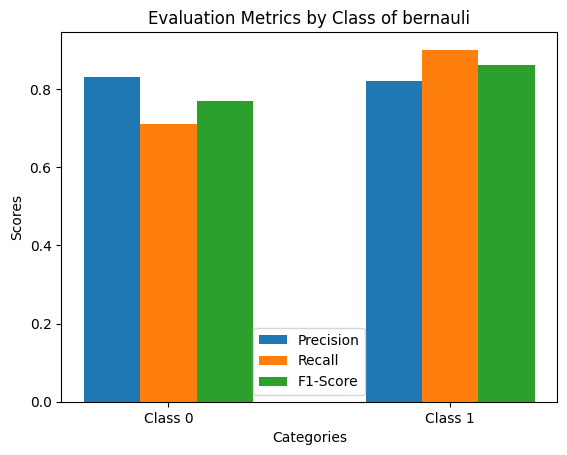

In [38]:
import matplotlib.pyplot as plt
import numpy as np

# Data
categories = ['Class 0', 'Class 1']
precision = [0.83, 0.82]
recall = [0.71, 0.90]
f1_score = [0.77, 0.86]

x = np.arange(len(categories))
width = 0.2

fig, ax = plt.subplots()
bar1 = ax.bar(x - width, precision, width, label='Precision')
bar2 = ax.bar(x, recall, width, label='Recall')
bar3 = ax.bar(x + width, f1_score, width, label='F1-Score')

# Labels and Title
ax.set_xlabel('Categories')
ax.set_ylabel('Scores')
ax.set_title('Evaluation Metrics by Class of bernauli')
ax.set_xticks(x)
ax.set_xticklabels(categories)
ax.legend()

plt.show()


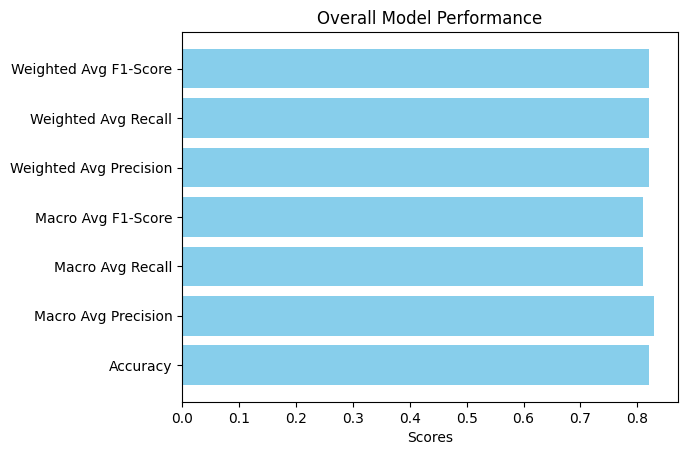

In [39]:
import matplotlib.pyplot as plt

# Data
metrics = ['Accuracy', 'Macro Avg Precision', 'Macro Avg Recall', 'Macro Avg F1-Score', 'Weighted Avg Precision', 'Weighted Avg Recall', 'Weighted Avg F1-Score']
values = [0.82, 0.83, 0.81, 0.81, 0.82, 0.82, 0.82]

fig, ax = plt.subplots()
ax.barh(metrics, values, color='skyblue')
ax.set_xlabel('Scores')
ax.set_title('Overall Model Performance')

plt.show()


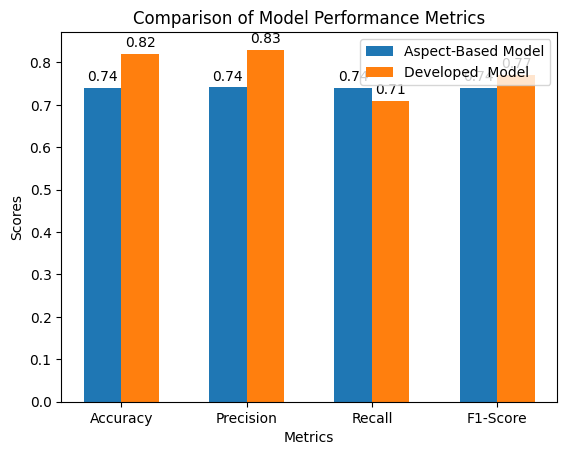

In [40]:
import matplotlib.pyplot as plt
import numpy as np

# Data
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
aspect_based_values = [0.740, 0.741, 0.740, 0.740]
our_model_values = [0.82, 0.83, 0.71, 0.77]

x = np.arange(len(metrics))
width = 0.3

fig, ax = plt.subplots()
bar1 = ax.bar(x - width/2, aspect_based_values, width, label='Aspect-Based Model')
bar2 = ax.bar(x + width/2, our_model_values, width, label='Developed  Model')

# Adding labels and title
ax.set_xlabel('Metrics')
ax.set_ylabel('Scores')
ax.set_title('Comparison of Model Performance Metrics')
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.legend()

# Adding value labels on top of the bars
def add_labels(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate('%.2f' % height,
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

add_labels(bar1)
add_labels(bar2)

plt.show()


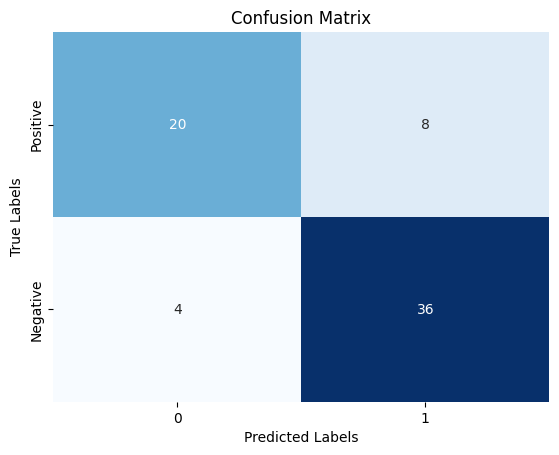

In [41]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Confusion matrix data
cm = np.array([[20, 8], [4, 36]])

fig, ax = plt.subplots()
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, ax=ax)
ax.set_xlabel('Predicted Labels')
ax.set_ylabel('True Labels')
ax.set_title('Confusion Matrix')

# Set the tick labels
ax.set_yticklabels([ 'Positive', 'Negative'])

plt.show()


In [42]:

def predict(nepali_text):

    if isinstance(nepali_text, str):
        nepali_text = [nepali_text]

    # Apply word_tokenize, remove_stopwords, and Stemming to each item in the list
    processed_text = []
    for text in nepali_text:
        tokens = NepaliTokenizer().tokenizer(text) # Use NepaliTokenizer
        tokens = remove_stopwords(" ".join(tokens))
        tokens = Stemming(tokens)
        tokens = remove_stopwords(tokens)
        processed_text.append("".join(tokens))

    # Transform the processed text using TF-IDF
    pred = tfidf.transform(processed_text)
    results = []
    for i in range(pred.shape[0]):
        if np.squeeze(clf3.predict(pred[i])) == 1:
            results.append(nepali_text[i] + ": Positive")
        else:
            results.append(nepali_text[i] + ": Negative")

    return results

In [44]:
predict("यो चलचित्र धेरै नै बोरिंग थियो र कथा पनि कमजोर थियो।")

NameError: name 'predict' is not defined